<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [386]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [387]:
hh_tmp = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', delimiter=';')
hh_data = hh_tmp.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [388]:
hh_data.head()


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [389]:
hh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [390]:
hh_data.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [391]:
def get_education(education):    
    words = education.split(' ')
    
    education_level = {
        'Высшее': 'высшее',
        'Неоконченное': 'неоконченное высшее',
        'Среднее': 'среднее',
        'Среднее специальное': 'среднее специальное'
    }
    
    for index in range(len(words)):
        if words[index] in education_level:
            tmp = f'{words[index]} {words[index + 1]}'
            if tmp in education_level:
                return education_level[tmp]
        return education_level[words[index]]
    
hh_data['Образование'] = hh_data['Образование и ВУЗ'].apply(get_education)
hh_data = hh_data.drop('Образование и ВУЗ', axis=1)
hh_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [392]:
def get_gender(raw_data):
    gender_age = raw_data.split(',')
    gender = gender_age[0].strip()
    return 'M' if gender == 'Мужчина' else 'Ж'

def get_age(raw_data):
    age = 0
    gender_age = raw_data.split(',')
    age = re.search(r'\d+', gender_age[1])
    return int(age.group(0))

hh_data['Пол'] = hh_data['Пол, возраст'].apply(get_gender)
hh_data['Возраст'] = hh_data['Пол, возраст'].apply(get_age)
female_percent = hh_data[hh_data['Пол'] == 'Ж'].shape[0] / hh_data.shape[0] * 100
hh_data = hh_data.drop('Пол, возраст', axis=1)
print('Процент женских:', round(female_percent, 2))
print('Cредний возраст соискателей:', round(hh_data['Возраст'].mean(), 1))


Процент женских: 19.07
Cредний возраст соискателей: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [393]:
def get_month_expirience(expirience):
    if pd.isna(expirience):
        return np.nan
    
    expirience_month = 0
    expirience = expirience.split(' ')[:6]
    for index in range(len(expirience)):
        if 'год' in expirience[index] or 'лет' in expirience[index]:
            expirience_month += int(expirience[index - 1]) * 12
        if 'месяц' in expirience[index]:
            expirience_month += int(expirience[index - 1])
    if not expirience_month:
        return np.nan
    return expirience_month

hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(get_month_expirience)
print('Медианный опыт работы (в месяцах)', hh_data['Опыт работы (месяц)'].median())
hh_data = hh_data.drop('Опыт работы', axis=1)

Медианный опыт работы (в месяцах) 100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [394]:
def get_city(raw_data):
    million_cities = [
        'Новосибирск', 
        'Екатеринбург', 
        'Нижний Новгород', 
        'Казань', 
        'Челябинск', 
        'Омск', 
        'Самара', 
        'Ростов-на-Дону', 
        'Уфа', 
        'Красноярск', 
        'Пермь', 
        'Воронеж', 
        'Волгоград'
    ]
    
    capitals = ['Москва', 'Санкт-Петербург']
    
    splitted_data = raw_data.split(',')[0]    
    city = splitted_data.strip()
    if city in million_cities:
        return 'город-миллионник'
    elif city not in capitals:
        return 'другие'
    return city

def get_ready_to_move(raw_data):
    if (
            'не готов к переезду' in raw_data 
            or 'не готова к переезду' in raw_data
    ):
        return False
    else:
        return True
    
def get_ready_to_trip(raw_data):
    if 'командировка' in raw_data:
        if (
            'не готов к командировкам' in raw_data 
            or 'не готова к командировкам' in raw_data
        ):
            return False
        else:            
            return True
    else:
        return False
      
   
hh_data['Город'] = hh_data['Город, переезд, командировки'].apply(get_city)
hh_data['Готовность к переезду'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_move)
hh_data['Готовность к командировкам'] = hh_data['Город, переезд, командировки'].apply(get_ready_to_trip)
st_piter_percent = hh_data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100
mask1 = hh_data['Готовность к переезду']
mask2 = hh_data['Готовность к командировкам']
move_trip_percent = hh_data[mask1 & mask2].shape[0] / hh_data.shape[0] *100
hh_data = hh_data.drop('Город, переезд, командировки', axis=1)
print('Процент соискателей из Санкт-Петербурга:', round(st_piter_percent))
print('Процент соискателей готовых и к переезду, и к командировке', round(move_trip_percent))

    

Процент соискателей из Санкт-Петербурга: 11
Процент соискателей готовых и к переезду, и к командировке 32


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [395]:

employments = [
    'полная занятость', 
    'частичная занятость',
    'проектная работа', 
    'волонтерство', 
    'стажировка'
]
schedules = [
    'полный день', 
    'сменный график', 
    'гибкий график', 
    'удаленная работа',
    'вахтовый метод'
]
for employment in employments:
    hh_data[employment] = hh_data['Занятость'].apply(lambda x: employment in x)
for schedule in schedules:
    hh_data[schedule] = hh_data['График'].apply(lambda x: schedule in x)
    
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)
print('Ищут проектную работу или волонтёрство:', hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])
print('Ищут работу вахтовым методом и гибкий график:', hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])

Ищут проектную работу или волонтёрство: 436
Ищут работу вахтовым методом и гибкий график: 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [396]:
def get_clean_date(raw_data):
    return raw_data.split(' ')[0]

def get_iso_currency(currency):
    iso_currencies = {
        'руб.': 'RUR',
        'грн.': 'UAH',
        'USD': 'USD',
        'бел.руб.': 'BYN',
        'KGS': 'KGS',
        'сум': 'UZS',
        'AZN': 'AZN',
        'KZT': 'KZT',
        'EUR': 'EUR'
    }
    return iso_currencies[currency]

currency_data = pd.read_csv('data/ExchangeRates.csv', delimiter=',')
hh_data['Обновление резюме'] = hh_data['Обновление резюме'].apply(get_clean_date)
hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'])
currency_data['date'] = pd.to_datetime(currency_data['date'])

hh_data['Валюта'] = hh_data['ЗП'].apply(lambda x: x.split(' ')[1])
hh_data['ЗП'] = hh_data['ЗП'].apply(lambda x: int(x.split(' ')[0]))
hh_data['Валюта'] = hh_data['Валюта'].apply(get_iso_currency)
hh_data.head()
hh_data = hh_data.merge(
    currency_data,
    left_on=['Обновление резюме', 'Валюта'],
    right_on=['date', 'currency'],
    how='left'
)
hh_data['proportion'] = hh_data['proportion'].apply(lambda x: 1 if pd.isna(x) else x)
hh_data['close'] = hh_data['close'].apply(lambda x: 1 if pd.isna(x) else x)
hh_data['ЗП (руб)'] = hh_data['ЗП'] * hh_data['close'] / hh_data['proportion']
hh_data = hh_data.drop('ЗП', axis=1)
print('Ожидаемая медианная ЗП в рублях:', hh_data['ЗП (руб)'].median())

Ожидаемая медианная ЗП в рублях: 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [397]:
fig = px.histogram(
    data_frame = hh_data,
    x='Возраст',
    marginal='box',
    title='Распределение по признаку Возраст',
    height=500,
    width=1000
)
fig.update_layout(
    yaxis_title='Количество соискателей'
)
fig.write_image('data/graphics/img1.png', engine='kaleido')
#fig.show()


Вывод: Из графика видно что мода распределения равна 30. 
Возраст большинства соискателей находится в диапазоне от примерно 27 до 36 лет. 
Также наблюдаются выбросы(справа), которые скорее всего говорят об ошибках в данных. Так как возраст выхода на пенсию как правило не превышает 65 лет, то врядли стоит брать их во внимание эти значения.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [398]:
fig = px.histogram(
    data_frame = hh_data,
    x='Опыт работы (месяц)',
    marginal='box',
    title='Распределение признака Опыт работы',
    height=500,
    width=1000
)
fig.update_layout(
    yaxis_title='Количество соискателей'
)
fig.write_image('data/graphics/img2.png', engine='kaleido')
#fig.show()

Вывод: Из графика видно что мода распределения равна 80-84 месяца.
Опыт работы большинства соискателей находится в диапазоне от 57 до 154 месяцев
Также наблюдаюся выбросы(справа) с опытом работы более 622 месяца т.е от 52 лет и выше. Особое внимание стоит обратить на 1188 месяцев опыта(99 лет) что однозначно является ошибкой.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [399]:
fig = px.histogram(
    data_frame = hh_data,
    x='ЗП (руб)',
    marginal='box',
    title='Распределение признака ЗП',
    histnorm='percent',
    height=500,
    width=1000
)
fig.update_layout(
    yaxis_title='Количество соискателей'
)
fig.write_image('data/graphics/img3.png', engine='kaleido')
#fig.show()

Вывод: Из графика видно(с трудом :)) что мода распределнеия примерно 40 тысяч. Желаемая заработная плата большинства соискателей находится в диапазоне от 37 - 95 тыс. руб.
Также есть аномальные значения, каковыми я считаю значения от 1 млн. и выше.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [400]:
bar_data = hh_data[hh_data['ЗП (руб)'] < 1000000].groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    color='Образование',
    text = 'Образование', 
    orientation='v',
    height=500,
    width=1000, 
    title='Зависимость ЗП от уровня Образования'
)
fig.write_image('data/graphics/img4.png', engine='kaleido')
#fig.show()

Вывод: Наибольшие зарплатные ожидание у соискателей с высшим образованием, наименьшие со средним и средним специальным.
Из этого следует что признак образование играет роль при прогнозировании заработной платы

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [401]:
bar_data = hh_data[hh_data['ЗП (руб)'] < 1000000]

fig = px.box(
    data_frame=bar_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение ЗП по Городам'
)
fig.write_image('data/graphics/img5.png', engine='kaleido')
#fig.show()

Вывод: Самый больщой медианный размах в Москве. При прогнозировании ЗП необходимо учитывать, что для столичных городов размер ожидаемой ЗП выше региональных.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [402]:
bar_data = hh_data.groupby(
    ['Готовность к переезду', 'Готовность к командировкам'],  
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    bar_data, 
    x='Готовность к переезду', 
    y='ЗП (руб)',
    color='Готовность к командировкам', 
    barmode='group',
    height=400,
    title='Зависимость медианной ЗП от (Готовность к переезду, Готовность к командировкам)'
)
fig.write_image('data/graphics/img6.png', engine='kaleido')
#fig.show()

Выводы: Ожидаемый уровень медианной ЗП выше у соискателей готовых и к Переезду и к Командировкам

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [403]:
pivot = hh_data.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc='median',
)
fig = px.imshow(pivot, title='Зависимость медианной ожидаемой ЗП от возраста')
fig.update_xaxes(side="top")
fig.write_image('data/graphics/img7.png', engine='kaleido')
#fig.show()

Выводы: Наибольшие зарплатные ожидания у соскателей с высшим образованием. В этой же категории наблюдается самый интенсивный рост ЗП причем по достижении пенсионного возраста ожидания не снижаются. В неоконченном высшем также наблюлается рост ЗП но по достижении пенсионного возраста зарплатные ожидания снижаются. В среднем и средне специальном картина примерно одинаковая, но в средне специальном наблюдается выброс(возраст соискателей превышает 80 лет).

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [404]:
import plotly.graph_objects as go

hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'] / 12
fig = px.scatter(
    hh_data,
    x='Возраст',
    y='Опыт работы (год)',
    title='Зависимость опыта работы от возраста'
)
fig.add_trace(
    go.Scatter(
        x=[0, 100],
        y=[0, 100],
        mode='lines',
        name='Опыт'
    )
)
fig.write_image('data/graphics/img8.png', engine='kaleido')
#fig.show()
cnt = hh_data[hh_data['Опыт работы (год)'] > hh_data['Возраст']]['Опыт работы (год)'].count()
print('Точек выше построенной прямой: ', cnt)
hh_data = hh_data.drop('Опыт работы (год)', axis=1)


Точек выше построенной прямой:  7


Вывод: 7 значений выбивается из общей картины, так как в них опыт работы превышает возраст соискателя. Также вызывает сомнение соискатель с возрастом 100 лет.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [405]:
bar_data = hh_data.groupby(
    'Пол',  
    as_index=False
)[['ЗП (руб)']].median()

fig = px.bar(
    data_frame=bar_data,
    x='Пол',
    y='ЗП (руб)',
    color='Пол',
    text = 'Пол', 
    orientation='v',
    height=500,
    width=1000, 
    title='Зависимость ожидаемой(медианной) ЗП от пола соискателя'
)
fig.write_image('data/graphics/img9.png', engine='kaleido')
#fig.show()

Вывод: Ожидаемая медианная ЗП у женщин ниже чем у мужчин.

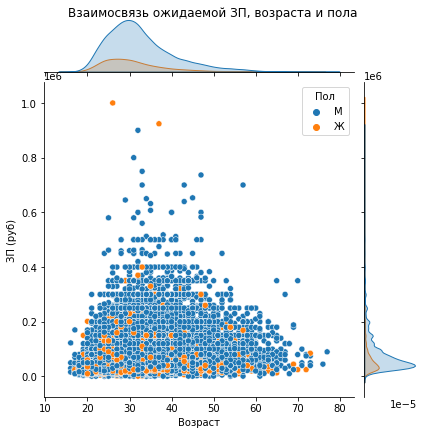

In [413]:
jointplot = sns.jointplot(
    data=hh_data, 
    x='Возраст', 
    y='ЗП (руб)',
    hue='Пол',
);
plt.suptitle('Взаимосвязь ожидаемой ЗП, возраста и пола', y = 1);

Вывод: Наблюдается выброс по ожидаемой ЗП(1 млн.) у женщины в возрасте примерно 25 лет. Количество женщин ищущих работу после 65 лет падает. Возможно это связано с более ранним выходом на пенсию. Также это возможно из традиционного(для стран СНГ) занятия внуками, чтобы родители могли заниматься работой/карьерой.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [414]:
duplicated = hh_data[hh_data.duplicated(subset=hh_data.columns)]
print(duplicated.shape[0])
hh_data = hh_data.drop_duplicates()
    

0


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [415]:
print(hh_data.info())
print(
    'Пропуски опыт работы (месяц):',
    hh_data['Опыт работы (месяц)'].isna().sum()
)
print(
    'Пропуски Последнее/нынешнее место работы:',
    hh_data['Последнее/нынешнее место работы'].isna().sum()
)
print(
    'Пропуски ',
    hh_data['Последняя/нынешняя должность'].isna().sum()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44482 entries, 0 to 44743
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44482 non-null  object        
 1   Последнее/нынешнее место работы  44482 non-null  object        
 2   Последняя/нынешняя должность     44482 non-null  object        
 3   Обновление резюме                44482 non-null  datetime64[ns]
 4   Авто                             44482 non-null  object        
 5   Образование                      44482 non-null  object        
 6   Пол                              44482 non-null  object        
 7   Возраст                          44482 non-null  int64         
 8   Опыт работы (месяц)              44482 non-null  float64       
 9   Город                            44482 non-null  object        
 10  Готовность к переезду            44482 non-null  bool     

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [416]:
tmp_data = hh_data.copy()
tmp_data = tmp_data.dropna(
    how='any', 
    subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'],
    axis=0
)
values = {
    'Опыт работы (месяц)': tmp_data['Опыт работы (месяц)'].median()
}
tmp_data = tmp_data.fillna(values)
print(round(tmp_data['Опыт работы (месяц)'].mean()))
hh_data = tmp_data.copy()

114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [417]:
mask1 = hh_data['ЗП (руб)'] > 1000000
mask2 = hh_data['ЗП (руб)'] < 1000
ejections = hh_data[mask1 | mask2]
print('Количество выбросов: ', ejections.shape[0])
hh_data = hh_data.drop(ejections.index, axis=0)

Количество выбросов:  0


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [418]:
mask = hh_data['Опыт работы (месяц)'] / 12 > hh_data['Возраст']
wrong_data = hh_data[mask]
print('Опыт работы превышает возраст:', wrong_data.shape[0], 'резюме')
hh_data = hh_data.drop(wrong_data.index, axis=0)

Опыт работы превышает возраст: 0 резюме


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Количество выбросов:  0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,вахтовый метод,Валюта,currency,per,date,time,close,vol,proportion,ЗП (руб)


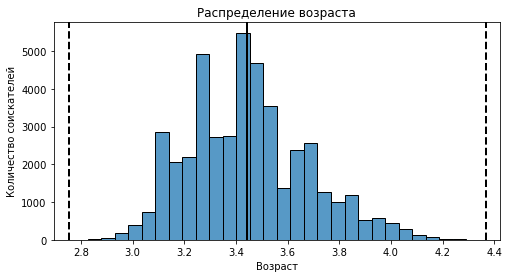

In [419]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set(ylabel='Количество соискателей')
log_age = np.log(hh_data['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=ax)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()+ 4 *log_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_age.mean()- 3 *log_age.std(), color='k', ls='--', lw=2)
histplot.set_title('Распределение возраста');

def outliers_z_score(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(hh_data, 'Возраст', log_scale=True, left=3, right=4)
print('Количество выбросов: ', outliers.shape[0])
display(outliers)
hh_data = cleaned.copy()




Вывод: Среднее значение находится правее моды. Распределений с правосторонней асимметрией.